# Calculating offense and defense EPA for each team

## 1 : Import of the librairies and data

In [1]:
#Libraries import 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from adjustText import adjust_text

In [2]:
#Data import
YEAR = 2020
data = pd.read_csv(
    'https://github.com/guga31bb/nflfastR-data/blob/master/data/play_by_play_' \
    + str(YEAR) + '.csv.gz?raw=True',compression='gzip', low_memory=False
   )

## 2. Cleaning and filtering of the data

In [3]:
#Correcting G.Minshew II that is present twice
data['passer_player_name'] = data['passer_player_name'].replace(['G.Minshew II'],'G.Minshew')

In [4]:
#Indicate the most recent week, or the one you want to analyze in particular
week = 13

#Clean the data and remove the plays by the special teams. Only keep the pass, runs and penalties
df = data[
    (data.week<=week) &
    (data.play_type.isin(['pass','run','no_play'])) &
    (data.epa.isna()==False)
    ]

## 3. Analysis of the EPA

In [5]:
#Calculate the average EPA for the offense by filtering on 'posteam'
#Transform it into a dataframe and rename the column 'epa' as 'off_epa'
off_epa = df.groupby('posteam')['epa'].mean().to_frame().rename(columns={"epa": "off_epa"})

In [6]:
#Calculate the average EPA for the defense by filtering on 'defteam'
#Transform it into a dataframe and rename the column 'epa' as 'def_epa'
def_epa = df.groupby('defteam')['epa'].mean().to_frame().rename(columns={"epa": "def_epa"})

In [7]:
#Merge the two into a single table
all_epa = pd.concat([off_epa, def_epa], axis=1)

## 4. Visualization

In [8]:
#Pass the DF with all data into a new DF
#the index of all_epa is the teams, so reset it and transform the teams into a regular column
viz = all_epa.reset_index().rename(columns={"index": "team"})

In [9]:
#List of all colours and the related team id
COLORS = {'ARI':'#97233F','ATL':'#A71930','BAL':'#241773','BUF':'#00338D','CAR':'#0085CA','CHI':'#00143F',
          'CIN':'#FB4F14','CLE':'#FB4F14','DAL':'#B0B7BC','DEN':'#002244','DET':'#046EB4','GB':'#24423C',
          'HOU':'#C9243F','IND':'#003D79','JAX':'#136677','KC':'#CA2430','LA':'#002147','LAC':'#2072BA',
          'LV':'#C4C9CC','MIA':'#0091A0','MIN':'#4F2E84','NE':'#0A2342','NO':'#A08A58','NYG':'#192E6C',
          'NYJ':'#203731','PHI':'#014A53','PIT':'#FFC20E','SEA':'#7AC142','SF':'#C9243F','TB':'#D40909',
          'TEN':'#4095D1','WAS':'#FFC20F'}

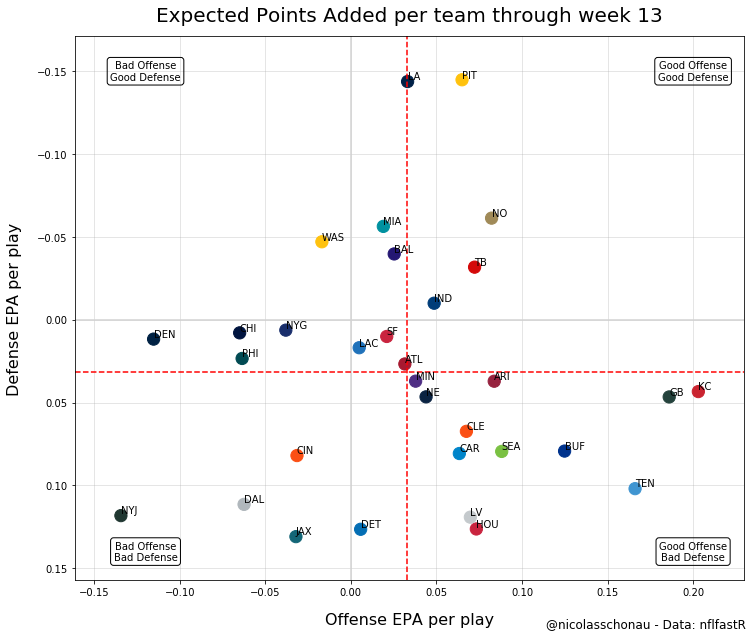

In [10]:
#Create a figure
fig, ax = plt.subplots(figsize=(12,10))

#Map the COLORS dictionary to the team column
viz['color'] = viz['team'].map(COLORS)

#Create the scatterplot, pass the data, the size of the dots and the the color map
plt.scatter(x = viz.off_epa, y = viz.def_epa, s=150,c=viz.color)

#Add labels to each data point
texts = [plt.text(x0,y0,name,ha='left',va='bottom') for x0,y0,name in zip(
    viz.off_epa, viz.def_epa, viz.team)]

#Add grid
ax.grid(zorder=0,alpha=.4)
ax.set_axisbelow(True)

#Invert the Y axis: a negative EPA is good for the defense, so you want to see it in the upper part of the chart
ax.invert_yaxis()

#Add title, labels, and cite the data source
ax.set_title(f'Expected Points Added per team through week {week}',fontsize=20,pad=15)
ax.set_xlabel('Offense EPA per play',fontsize=16,labelpad=15)
ax.set_ylabel('Defense EPA per play',fontsize=16,labelpad=15)
plt.figtext(.67,.06,'@nicolasschonau - Data: nflfastR',fontsize=12)

#Create two lines to show the beginning of the axes
plt.axvline(0, color='lightgrey')
plt.axhline(0, color='lightgrey')

#Calculate the value for offense and defense, then use it for average lines 
off_epa_avg = viz['off_epa'].mean()
def_epa_avg = viz['def_epa'].mean()
plt.axvline(off_epa_avg, color='red',ls='dashed')
plt.axhline(def_epa_avg, color='red',ls="dashed")

#Add boxes in the corners of the plot to facilitate the interpretation of the data
badoff_gooddef = plt.text(-0.12, -0.15, 'Bad Offense\nGood Defense', horizontalalignment='center',verticalalignment='center',
                         bbox=dict(facecolor='none',boxstyle="round,pad=0.3"))
goooff_gooddef = plt.text(0.2, -0.15, 'Good Offense\nGood Defense', horizontalalignment='center',verticalalignment='center',
                         bbox=dict(facecolor='none',boxstyle="round,pad=0.3"))
badoff_baddef = plt.text(-0.12, 0.14, 'Bad Offense\nBad Defense', horizontalalignment='center',verticalalignment='center',
                         bbox=dict(facecolor='none',boxstyle="round,pad=0.3"))
goodoff_baddef = plt.text(0.2, 0.14, 'Good Offense\nBad Defense', horizontalalignment='center',verticalalignment='center',
                         bbox=dict(facecolor='none',boxstyle="round,pad=0.3"))